## Import Libraries

In [3]:
import pandas as pd
import numpy as np

from pathlib import Path

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## Load the cleaned data

In [4]:
train_df = pd.read_csv("C:/Projects/04_Fake_News_Detection/data/clean_train.csv")
test_df = pd.read_csv("C:/Projects/04_Fake_News_Detection/data/clean_test.csv")

X_train = train_df["combined_text"]
y_train = train_df["label"]

X_test  = test_df["combined_text"]
y_test  = test_df["label"]

train_df.shape, test_df.shape


((50933, 2), (12734, 2))

## TF-IDF Vectorization

In [5]:
vectorizer = TfidfVectorizer(
    max_features=20000,
    stop_words="english",
    ngram_range=(1,2)   # unigrams + bigrams
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf  = vectorizer.transform(X_test)

X_train_tfidf.shape

(50933, 20000)

## Train Logistic Regression ( Baseline model )

In [6]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)

y_pred_lr = lr.predict(X_test_tfidf)

print("Logistic Regression Results:\n")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results:

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      6958
           1       0.94      0.95      0.95      5776

    accuracy                           0.95     12734
   macro avg       0.95      0.95      0.95     12734
weighted avg       0.95      0.95      0.95     12734



## Confusion Matrix

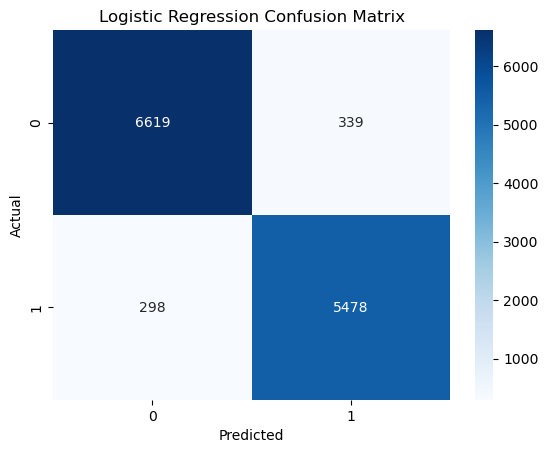

In [7]:
cm = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

## Train Linear SVM ( Stronger Baseline model)

In [8]:
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)

y_pred_svm = svm.predict(X_test_tfidf)

print("Linear SVM Results:\n")
print(classification_report(y_test, y_pred_svm))

Linear SVM Results:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6958
           1       0.95      0.96      0.95      5776

    accuracy                           0.96     12734
   macro avg       0.96      0.96      0.96     12734
weighted avg       0.96      0.96      0.96     12734



Baseline models achieved strong performance, with Logistic Regression reaching ~95% accuracy and Linear SVM achieving ~96%. The SVM model demonstrated slightly better overall performance, indicating that linear margin-based classifiers perform well on TF-IDF text representations.

## Save the best model

In [9]:
import joblib
joblib.dump(svm, "../models/svm_model.pkl")
joblib.dump(vectorizer, "../models/tfidf_vectorizer.pkl")


['../models/tfidf_vectorizer.pkl']